In [160]:
import numpy as np
import pandas as pd


In [161]:
df = pd.read_csv('spam_or_not_spam.csv')

In [162]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [163]:
df.duplicated().sum()

127

In [164]:
df = df.drop_duplicates()

In [165]:
df.duplicated().sum()

0

In [166]:
df.isna().sum()

email    1
label    0
dtype: int64

In [167]:
df.shape

(2873, 2)

In [168]:
df = df.dropna()

In [169]:
df.shape

(2872, 2)

In [170]:
df['label'].value_counts()

0    2445
1     427
Name: label, dtype: int64

In [171]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


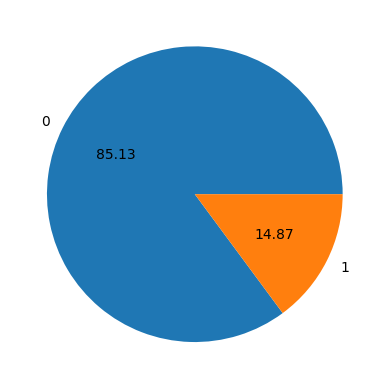

In [172]:


import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['0', '1'], autopct="%0.2f")
plt.show()


In [173]:

import nltk


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [174]:
df['num_characters'] = df['email'].apply(len)

In [175]:
df

,email,label,num_characters
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771
...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,561
2996,hyperlink hyperlink hyperlink let mortgage le...,1,468
2997,thank you for shopping with us gifts for all ...,1,864
2998,the famous ebay marketing e course learn to s...,1,4129


In [176]:
# num of words
df['num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))


In [177]:
df

,email,label,num_characters,num_words
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257
1,martin a posted tassos papadopoulos the greek ...,0,643,113
2,man threatens explosion in moscow thursday aug...,0,1509,256
3,klez the virus that won t die already the most...,0,1015,169
4,in adding cream to spaghetti carbonara which ...,0,771,144
...,...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,561,96
2996,hyperlink hyperlink hyperlink let mortgage le...,1,468,79
2997,thank you for shopping with us gifts for all ...,1,864,154
2998,the famous ebay marketing e course learn to s...,1,4129,747


In [178]:
df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [179]:
df

,email,label,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1
...,...,...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,561,96,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1,468,79,1
2997,thank you for shopping with us gifts for all ...,1,864,154,1
2998,the famous ebay marketing e course learn to s...,1,4129,747,1


In [180]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2872.000000,2872.000000,2872.000000
mean,1438.809889,240.099582,0.999652
std,5020.272938,573.146438,0.018660
min,1.000000,0.000000,0.000000
25%,394.000000,69.000000,1.000000
50%,769.000000,136.000000,1.000000
75%,1362.250000,238.000000,1.000000
max,200408.000000,13309.000000,1.000000


In [181]:
df.shape

(2872, 5)

In [182]:
df=df[df['num_words']<400]

In [183]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2524.000000,2524.000000,2524.000000
mean,765.217908,134.345087,0.999604
std,516.382489,90.999411,0.019905
min,1.000000,0.000000,0.000000
25%,353.000000,61.000000,1.000000
50%,665.000000,118.000000,1.000000
75%,1075.000000,188.000000,1.000000
max,3018.000000,399.000000,1.000000


In [184]:
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2193.000000,2193.000000,2193.0
mean,748.621523,132.644779,1.0
std,511.686452,91.274982,0.0
min,5.000000,1.000000,1.0
25%,329.000000,58.000000,1.0
50%,646.000000,115.000000,1.0
75%,1064.000000,188.000000,1.0
max,2402.000000,399.000000,1.0


In [185]:
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,331.000000,331.000000,331.000000
mean,875.175227,145.610272,0.996979
std,534.387369,88.463770,0.054965
min,1.000000,0.000000,0.000000
25%,486.000000,80.000000,1.000000
50%,826.000000,138.000000,1.000000
75%,1153.000000,188.500000,1.000000
max,3018.000000,398.000000,1.000000


In [186]:
import seaborn as sns

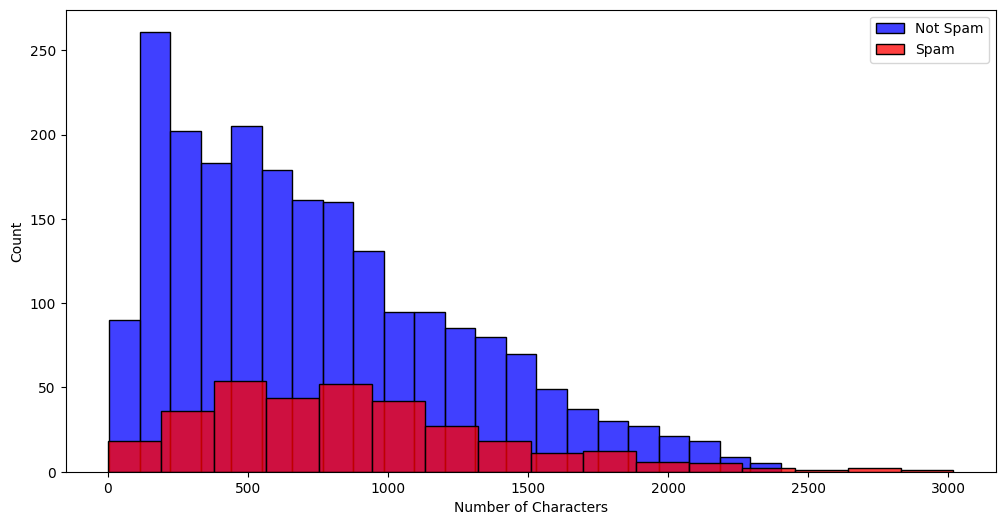

In [187]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue')
sns.histplot(df[df['label'] == 1]['num_characters'], color='red')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.legend(['Not Spam', 'Spam'])
plt.show()

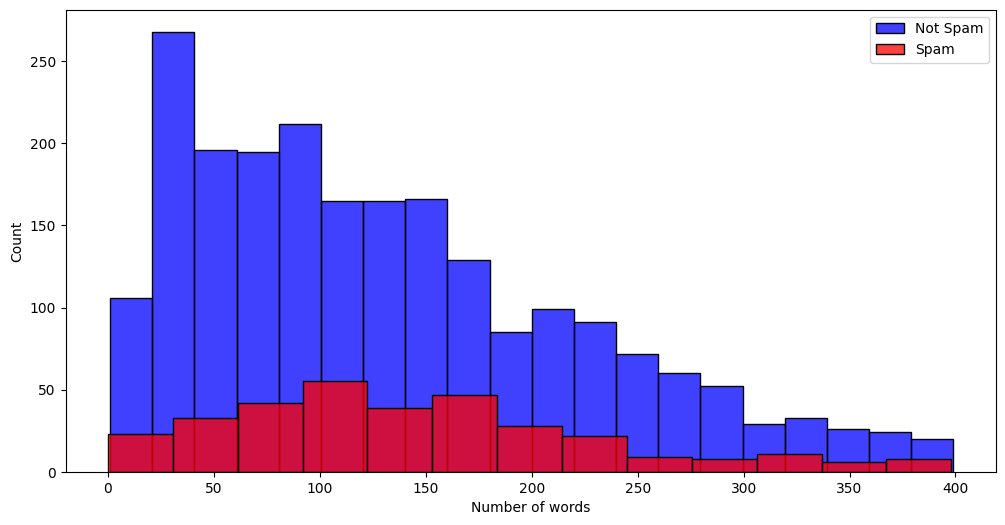

In [188]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'], color='blue')
sns.histplot(df[df['label'] == 1]['num_words'], color='red')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.legend(['Not Spam', 'Spam'])
plt.show()

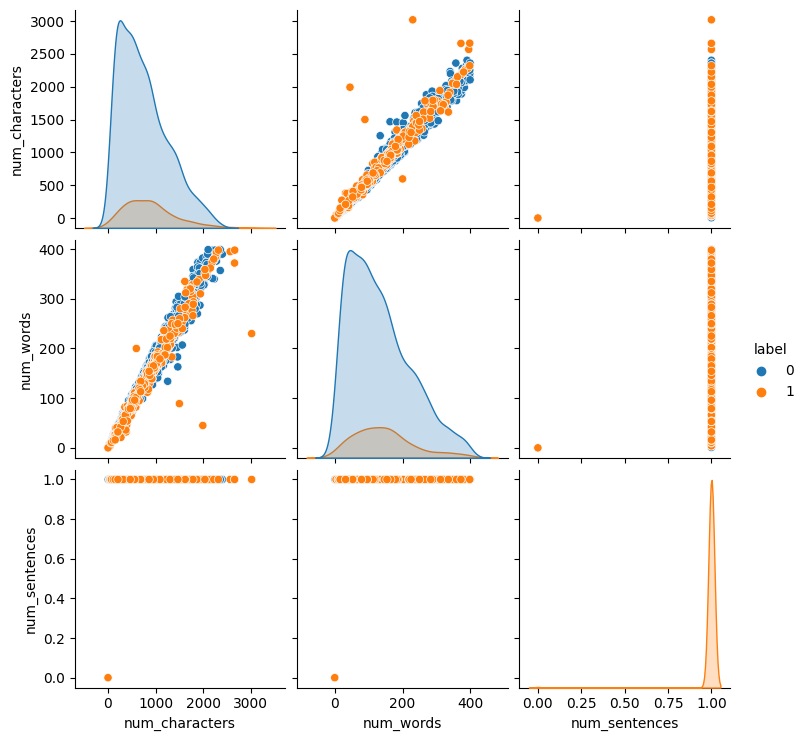

In [189]:

sns.pairplot(df, hue='label')

C:\Users\saur\AppData\Local\Temp\ipykernel_4232\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

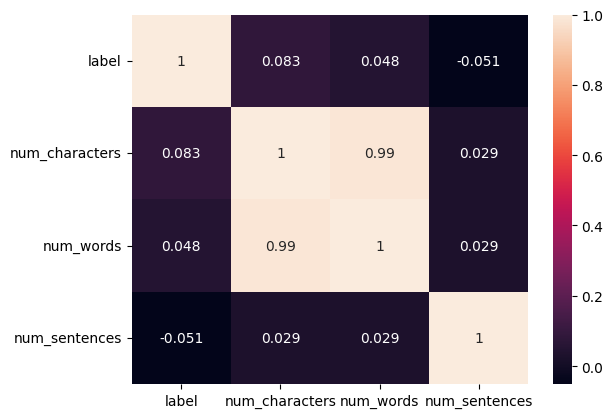

In [190]:
sns.heatmap(df.corr(),annot=True)

In [191]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [192]:
df['email'][10]


'hello have you seen and discussed this article and his approach thank you URL hell there are no rules here we re trying to accomplish something thomas alva edison this URL email is sponsored by osdn tired of that same old cell phone get a new here for free URL _______________________________________________ spamassassin devel mailing list spamassassin devel URL URL '

In [193]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re
from bs4 import BeautifulSoup

In [199]:
nltk.download('stopwords')

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_http(text):
    return re.sub(r'http\S+', '', text)
def stemming(text):
    ps = PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return (text)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_http(text)
    text = stemming(text)
    text = remove_stopwords(text)
    
    return text

df['transformed_text']=df['email'].apply(denoise_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\saur\AppData\Local\Temp\ipykernel_4232\1242303063.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['email'].apply(denoise_text)


In [200]:
df['transformed_text'][10]

'hello seen discuss thi articl hi approach thank url hell rule tri accomplish someth thoma alva edison thi url email sponsor osdn tire old cell phone get new free url spamassassin devel mail list spamassassin devel url url'

In [197]:
df['email'][10]

'hello have you seen and discussed this article and his approach thank you URL hell there are no rules here we re trying to accomplish something thomas alva edison this URL email is sponsored by osdn tired of that same old cell phone get a new here for free URL _______________________________________________ spamassassin devel mailing list spamassassin devel URL URL '

In [201]:
df

,email,label,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara ha effect pasta m...
...,...,...,...,...,...,...
2992,wealth without risk discover the best kept se...,1,1470,250,1,wealth without risk discov best kept secret am...
2993,attn sir madan strictly confidential i am plea...,1,2320,398,1,attn sir madan strictli confidenti pleas intro...
2995,abc s good morning america ranks it the NUMBE...,1,561,96,1,abc good morn america rank number christma toy...
2996,hyperlink hyperlink hyperlink let mortgage le...,1,468,79,1,hyperlink hyperlink hyperlink let mortgag lend...


In [202]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [203]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))


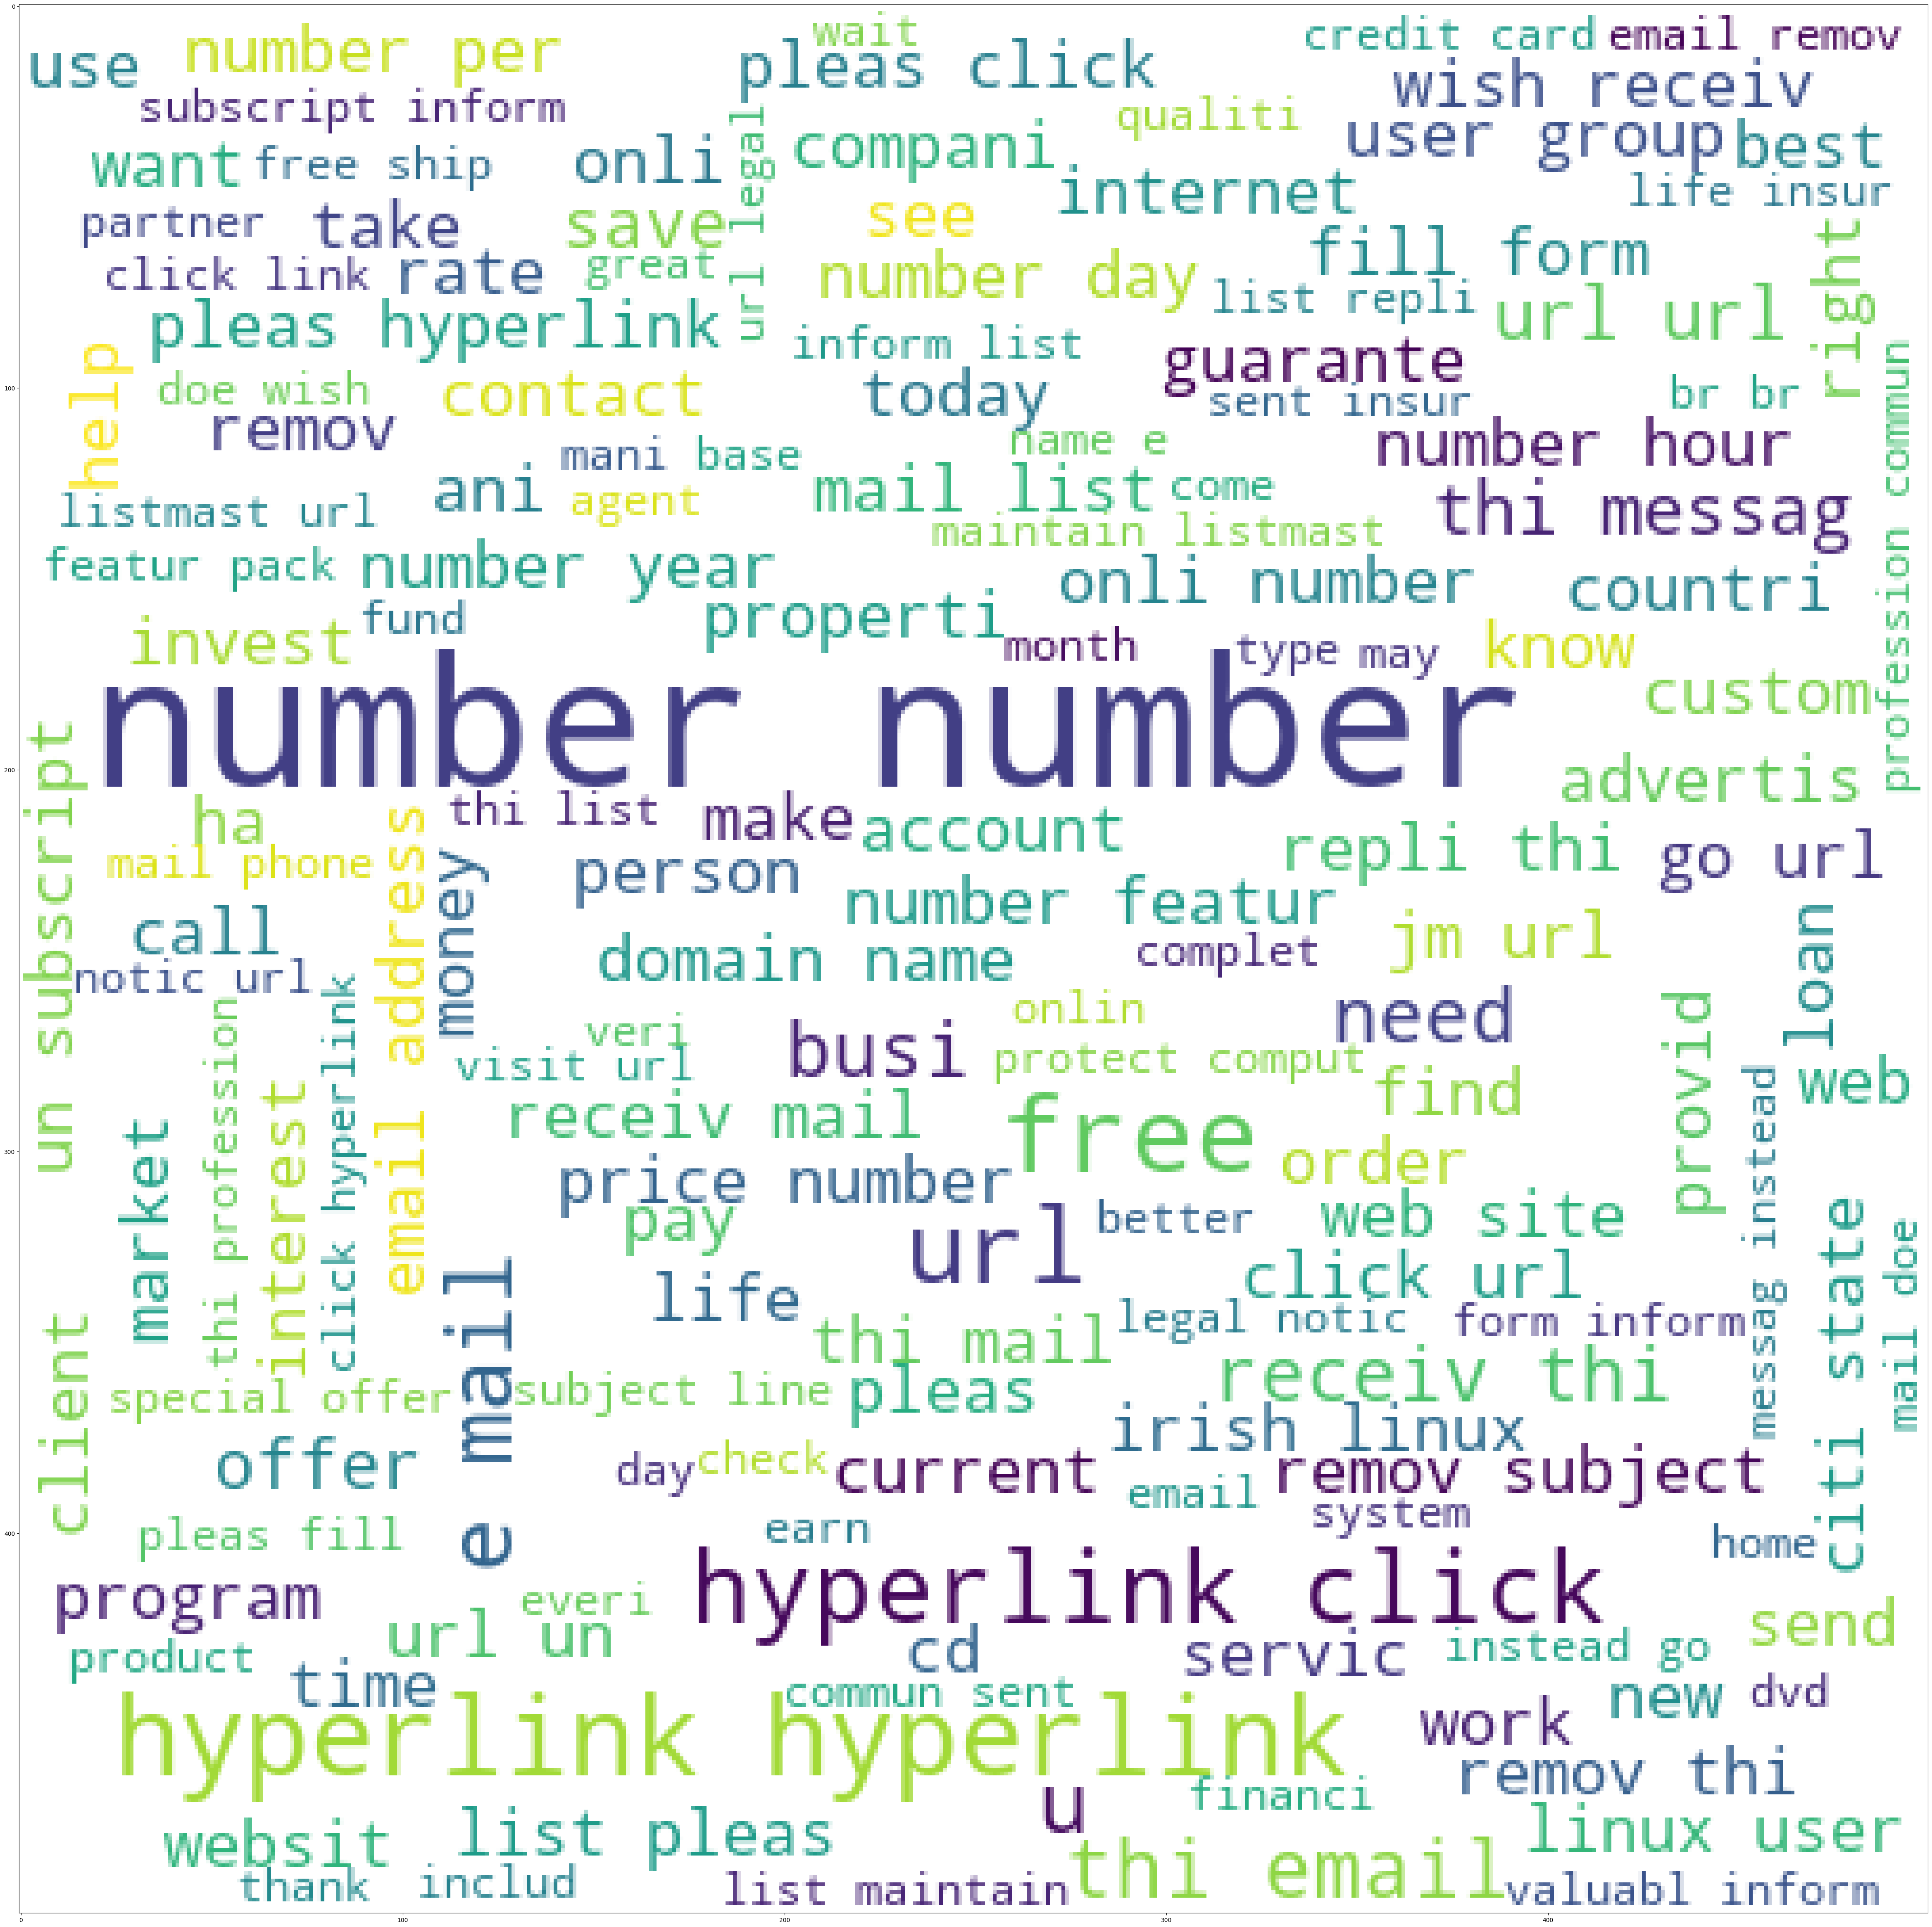

In [206]:
plt.figure(figsize=(150,60))
plt.imshow(spam_wc)

In [208]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))


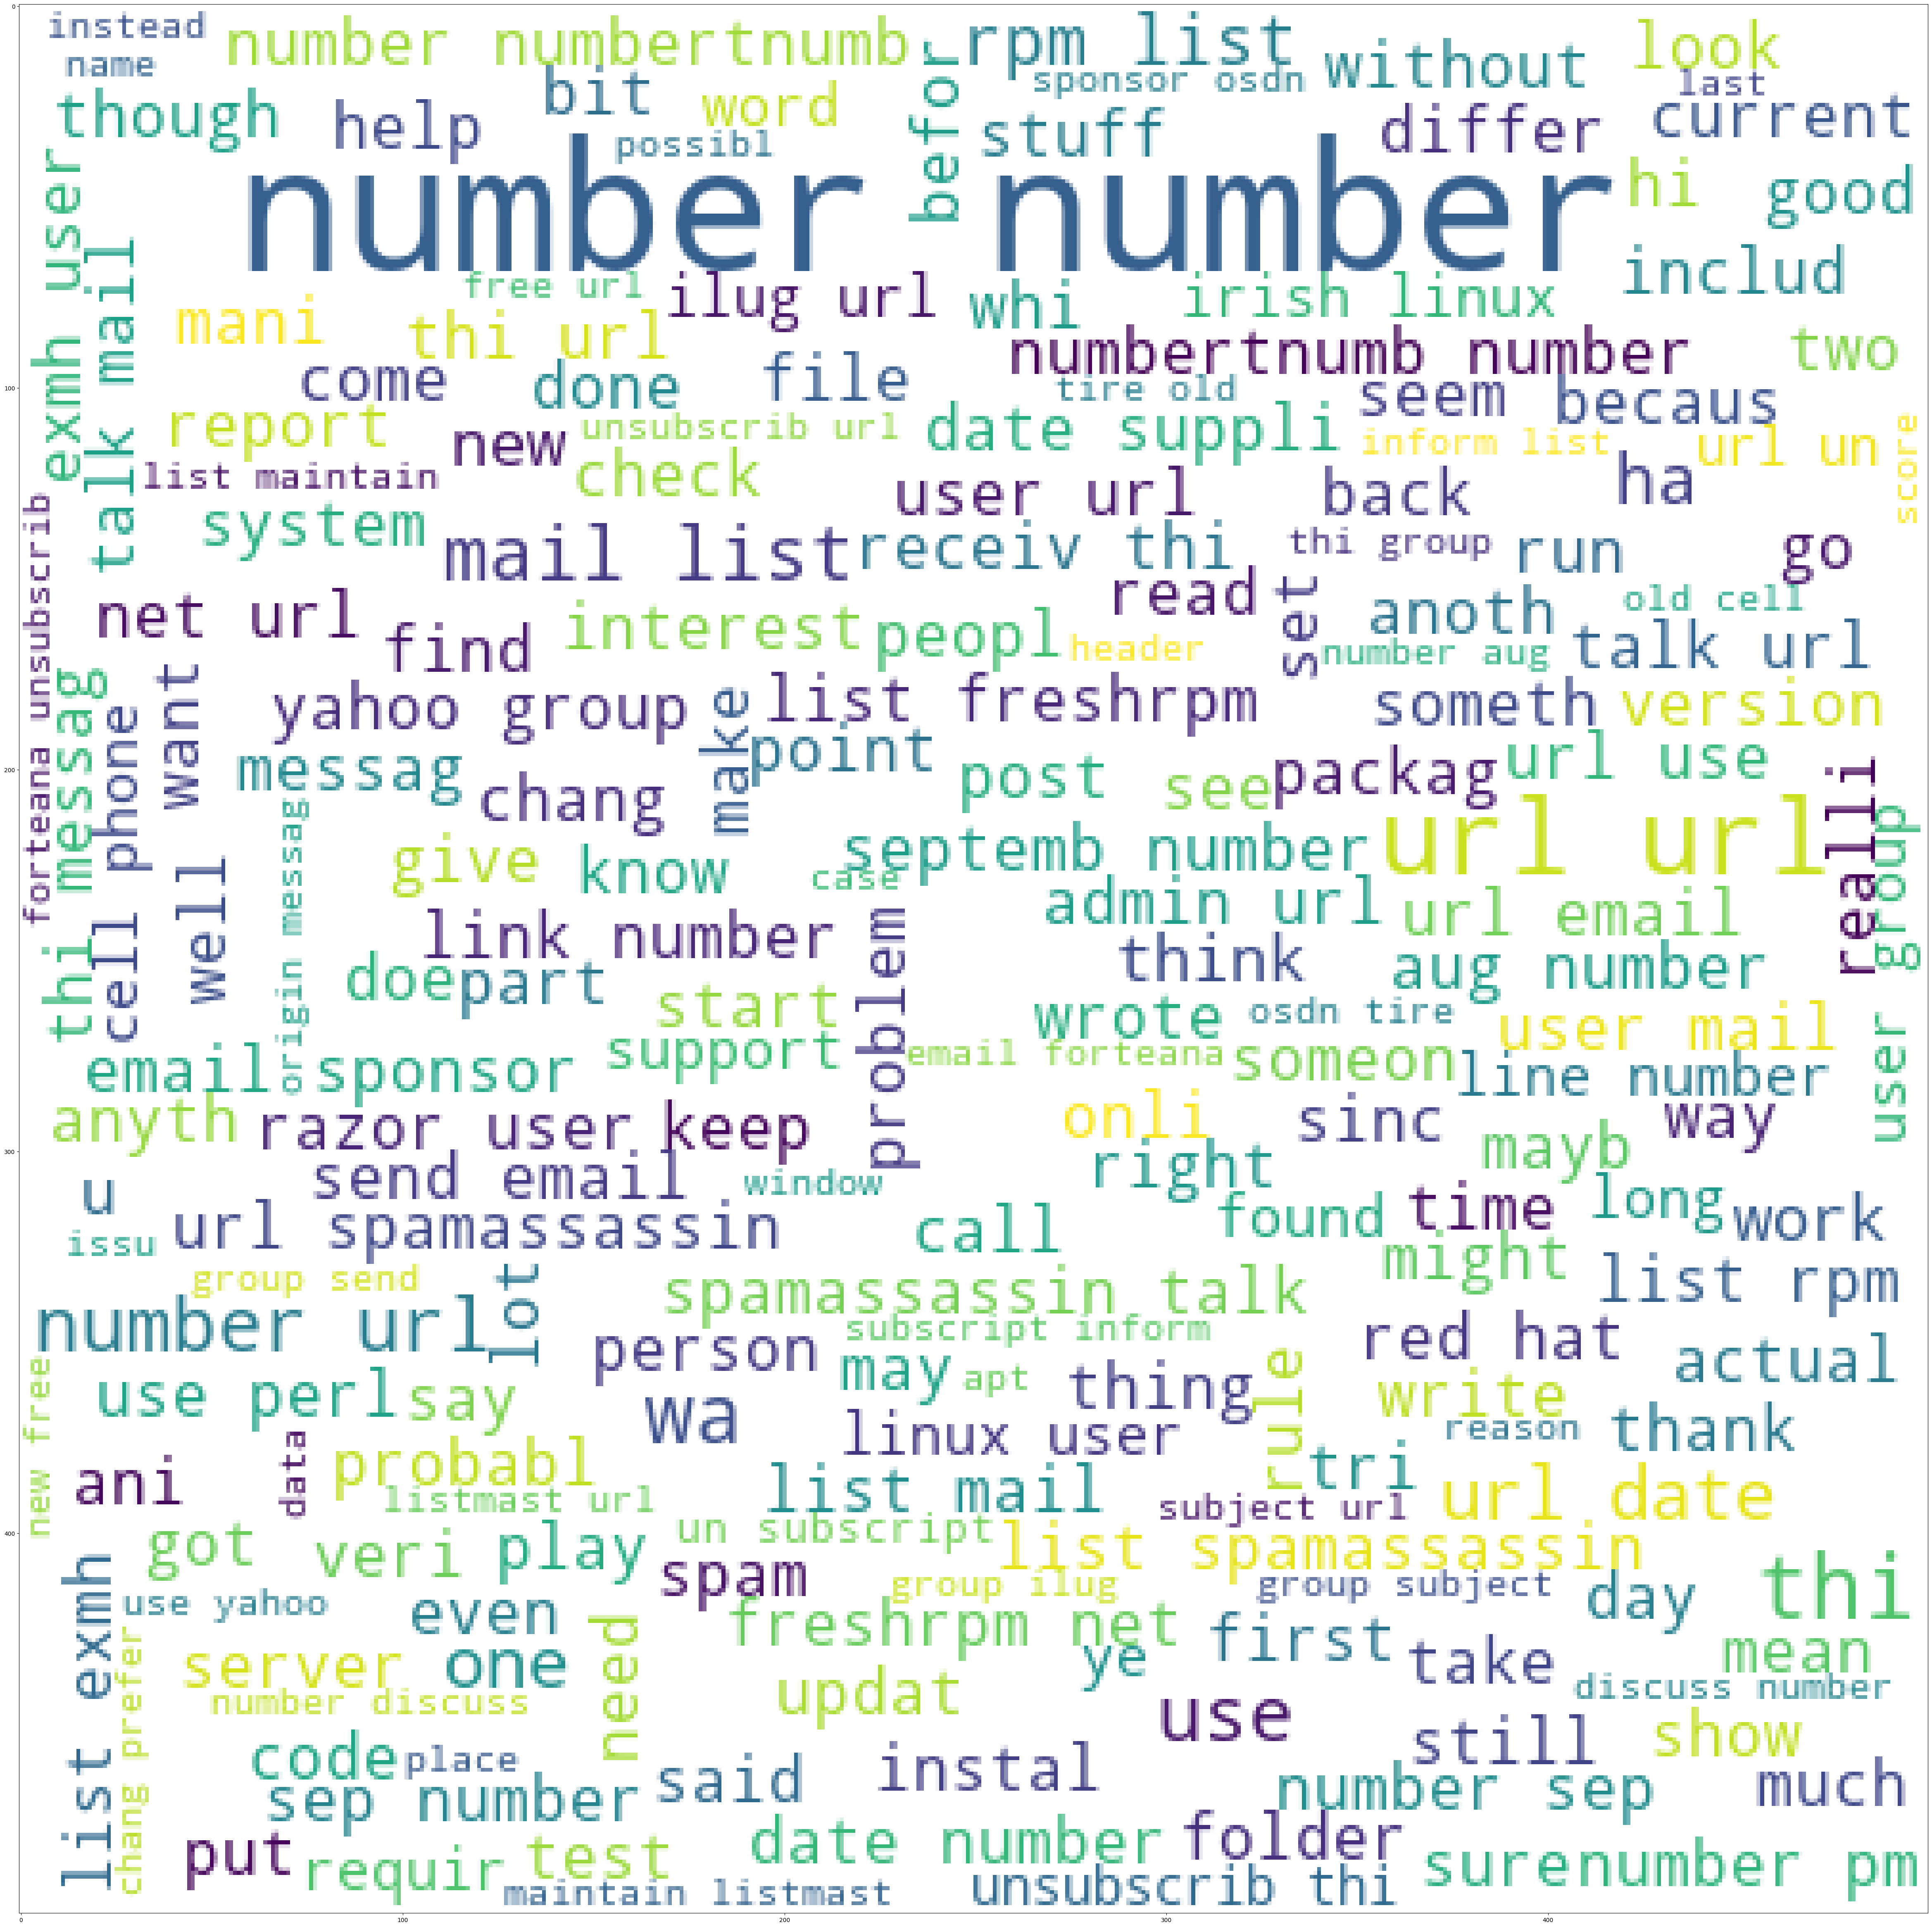

In [210]:
plt.figure(figsize=(150,60))
plt.imshow(ham_wc)

In [213]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [214]:

len(spam_corpus)

30418

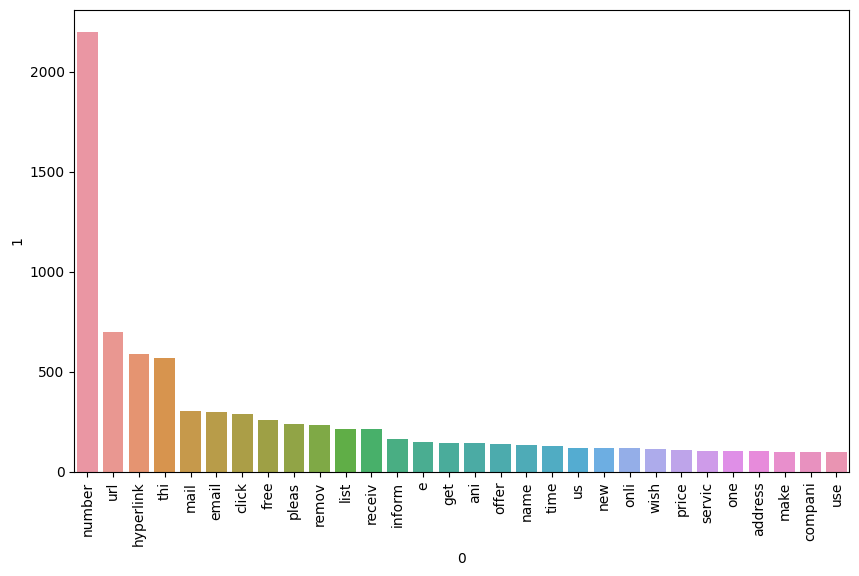

In [231]:
from collections import Counter
plt.figure(figsize=(10,6))
barplot_data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=barplot_data[0], y=barplot_data[1])
plt.xticks(rotation='vertical')
plt.show()

In [232]:

ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [233]:
len(ham_corpus)

178280

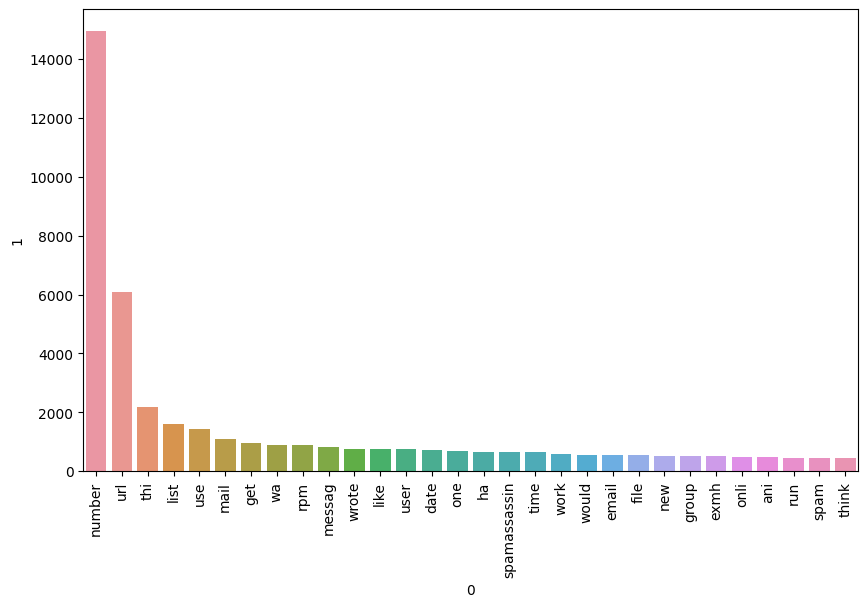

In [234]:
plt.figure(figsize=(10,6))
barplot_data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=barplot_data[0], y=barplot_data[1])
plt.xticks(rotation='vertical')
plt.show()

In [235]:

# Text Vectorization
# using Bag of Words
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara ha effect pasta m...


In [236]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [237]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [238]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [239]:
X.shape

(2524, 14454)

In [240]:

y = df['label'].values

In [241]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)




In [242]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [243]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9445544554455445
[[439   2]
 [ 26  38]]
0.95


In [244]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9861386138613861
[[437   4]
 [  3  61]]
0.9384615384615385


In [245]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9663366336633663
[[439   2]
 [ 15  49]]
0.9607843137254902


In [246]:
tfidf = TfidfVectorizer(max_features=3000)

In [247]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [250]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=13)


In [251]:
bnb.fit(X1_train,y_train)
y_pred3 = bnb.predict(X1_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9762376237623762
[[438   3]
 [  9  55]]
0.9482758620689655


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [253]:
xt=ExtraTreesClassifier()

In [256]:
xt.fit(X_train,y_train)
y_pred = xt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9801980198019802
[[440   1]
 [  9  55]]
0.9821428571428571


In [257]:
rn=RandomForestClassifier()

In [258]:
rn.fit(X_train,y_train)
y_pred = rn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9762376237623762
[[441   0]
 [ 12  52]]
1.0


In [259]:
from sklearn.ensemble import VotingClassifier

In [260]:
vt = VotingClassifier(estimators=[
    ('xt', ExtraTreesClassifier()),
    ('rn', RandomForestClassifier())
])

In [261]:
vt.fit(X_train,y_train)
y_pred = vt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9722772277227723
[[441   0]
 [ 14  50]]
1.0


In [262]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [263]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [268]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8
Precision -  0.17543859649122806
For  KN
Accuracy -  0.9207920792079208
Precision -  0.7857142857142857
For  NB
Accuracy -  0.9861386138613861
Precision -  0.9384615384615385
For  DT
Accuracy -  0.9564356435643564
Precision -  0.875
For  LR
Accuracy -  0.9861386138613861
Precision -  1.0
For  RF
Accuracy -  0.9782178217821782
Precision -  1.0
For  AdaBoost
Accuracy -  0.9762376237623762
Precision -  0.9482758620689655
For  BgC
Accuracy -  0.9643564356435643
Precision -  0.8709677419354839
For  ETC
Accuracy -  0.9801980198019802
Precision -  1.0
For  GBDT
Accuracy -  0.9663366336633663
Precision -  0.9122807017543859


In [ ]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('model.pkl','wb'))

In [ ]:
import pickleimport pickle